# Imports and Configuration

Imports

In [56]:
# imports code
import os
import numpy as np
import enum
from datetime import datetime

Mount Google Drive with data

In [57]:
# Mount a google drive where data are stored (Relevant if you run it on Google Colab instead of your pc)
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Configure path to data

In [58]:
data_path = "/content/drive/My Drive/Colab Notebooks/data/waymo_open_dataset"

# Provided sample code

In [59]:
!rm -rf waymo-od > /dev/null
!git clone https://github.com/waymo-research/waymo-open-dataset.git waymo-od
!cd waymo-od && git branch -a
!cd waymo-od && git checkout remotes/origin/master
!pip3 install --upgrade pip

Cloning into 'waymo-od'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 865 (delta 3), reused 4 (delta 0), pack-reused 844
Receiving objects: 100% (865/865), 14.18 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (553/553), done.
* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/master
  remotes/origin/r1.0
  remotes/origin/r1.0-tf1.15
  remotes/origin/r1.0-tf2.0
  remotes/origin/r1.2
Note: checking out 'remotes/origin/master'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 533b142 Fix ignoring camera modu

## Read one frame

In [60]:
!pip3 install waymo-open-dataset-tf-2-1-0==1.2.0

In [61]:
import tensorflow.compat.v1 as tf

import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

In [ ]:
def load_first_frame(FILEPATH):
  '''
  Loads the first frame from provided recording

  Args:
    FILEPATH(str): path to the recording

  Returns:
    frame
  '''

  frame = None

  dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
  for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    break
    
  return frame

  ''' code to iterate over all frames:
  for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
  '''

FILEPATH = data_path + '/Training/training_0000/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord'
frame = load_first_frame(FILEPATH)


NameError: ignored

In [ ]:
print(frame.context)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Visualize Camera Images and Camera Labels

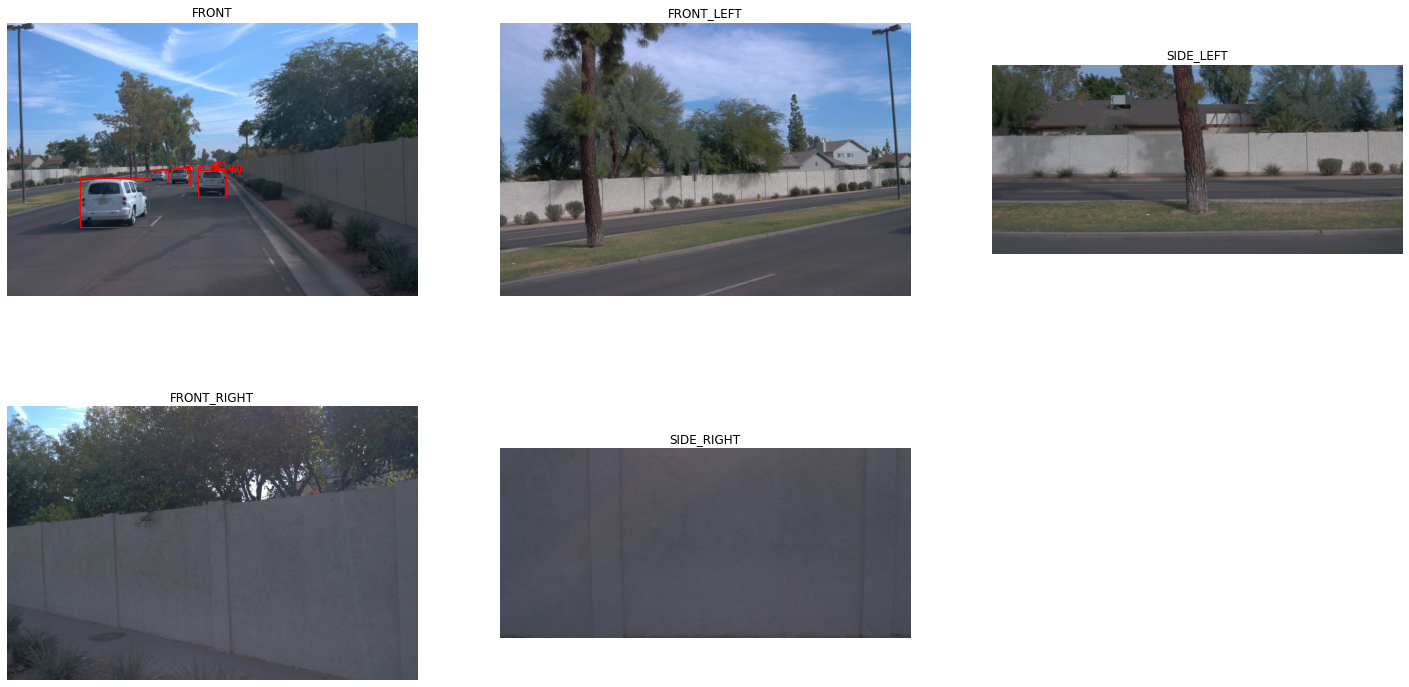

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_camera_image(camera_image, camera_labels, layout, cmap=None):
  """Show a camera image and the given camera labels."""

  ax = plt.subplot(*layout)

  # Draw the camera labels.
  for camera_labels in frame.camera_labels:
    # Ignore camera labels that do not correspond to this camera.
    if camera_labels.name != camera_image.name:
      continue

    # Iterate over the individual labels.
    for label in camera_labels.labels:
      # Draw the object bounding box.
      ax.add_patch(patches.Rectangle(
        xy=(label.box.center_x - 0.5 * label.box.length,
            label.box.center_y - 0.5 * label.box.width),
        width=label.box.length,
        height=label.box.width,
        linewidth=1,
        edgecolor='red',
        facecolor='none'))

  # Show the camera image
  plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
  plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
  plt.grid(False)
  plt.axis('off')

plt.figure(figsize=(25, 20))

for index, image in enumerate(frame.images):
  show_camera_image(image, frame.camera_labels, [3, 3, index+1])

# My exploration code

In [ ]:
frame.camera_labels

[name: FRONT
labels {
  box {
    center_x: 809.6983799999999
    center_y: 720.0126
    width: 75.15921000000003
    length: 89.68578000000002
  }
  type: TYPE_VEHICLE
  id: "1a7162c2-e63a-42b2-96dd-9f3ba7ee5568"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 969.49065
    center_y: 681.48561
    width: 22.10564999999997
    length: 31.579500000000053
  }
  type: TYPE_VEHICLE
  id: "1fa810d1-9956-4238-8ca5-41d8a0203cc9"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 954.96408
    center_y: 671.3801699999999
    width: 12.631799999999998
    length: 13.263389999999958
  }
  type: TYPE_VEHICLE
  id: "3b6a8c8c-7940-453d-a22c-4c3bd9ed9c1c"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 500.21928
    center_y: 841.27788
    width: 228.00398999999993
    length: 324.00567000000007
  }
  type: TYPE_VEHICLE
  id:

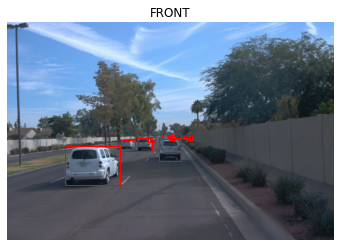

In [ ]:
show_camera_image(frame.images[0], frame.camera_labels[0], [1, 1, 1])

# Metric Calculation

## Waymo Metric Calculation

In [ ]:
!sudo apt install build-essential
!sudo apt-get install --assume-yes pkg-config zip g++ zlib1g-dev unzip python3 python3-pip
!wget https://github.com/bazelbuild/bazel/releases/download/0.28.0/bazel-0.28.0-installer-linux-x86_64.sh
!sudo bash ./bazel-0.28.0-installer-linux-x86_64.sh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
unzip is already the newest version (6.0-21ubuntu1).
zip is already the newest version (3.0-11build1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
python3 is already the newest version (3.6.7-1~18.04).
The following additional packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pkg-resources python3-secretstorage python3-setuptools python3-si

In [ ]:
!cd waymo-od && ./configure.sh && cat .bazelrc && bazel clean

Using installed tensorflow
2020-05-22 14:40:51.715192: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-05-22 14:40:51.715352: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-05-22 14:40:51.715379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2020-05-22 14:40:54.444782: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'li

In [ ]:
!cd waymo-od && bazel build ... --show_progress_rate_limit=10.0

Loading: 
Analyzing: 88 targets (45 packages loaded, 1087 targets configured)
    Fetching @remote_java_tools_linux; fetching
Analyzing: 88 targets (61 packages loaded, 2142 targets configured)
INFO: Analyzed 88 targets (62 packages loaded, 2279 targets configured).
INFO: Found 88 targets...
[11 / 281] 2 actions, 1 running
    @com_google_protobuf//:protobuf_lite; 3s processwrapper-sandbox
[19 / 281] 2 actions, 1 running
    @com_google_protobuf//:protobuf; 0s processwrapper-sandbox
[25 / 281] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 2s processwrapper-sandbox
[36 / 281] 2 actions, 1 running
    @com_google_protobuf//:protobuf; 11s processwrapper-sandbox
[48 / 281] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 3s processwrapper-sandbox
[56 / 281] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 2s processwrapper-sandbox
[65 / 281] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 0s processwrapper-sandbox
[70 / 281] 2 actions running

In [ ]:
!cd waymo-od && bazel-bin/waymo_open_dataset/metrics/tools/compute_detection_metrics_main waymo_open_dataset/metrics/tools/fake_predictions.bin  waymo_open_dataset/metrics/tools/fake_ground_truths.bin

4 examples found.

OBJECT_TYPE_TYPE_VEHICLE_LEVEL_1: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_VEHICLE_LEVEL_2: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_PEDESTRIAN_LEVEL_1: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_PEDESTRIAN_LEVEL_2: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_SIGN_LEVEL_1: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_SIGN_LEVEL_2: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_CYCLIST_LEVEL_1: [mAP 0] [mAPH 0]
OBJECT_TYPE_TYPE_CYCLIST_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[0, 30)_LEVEL_1: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[0, 30)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[30, 50)_LEVEL_1: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[30, 50)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[50, +inf)_LEVEL_1: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[50, +inf)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_PEDESTRIAN_[0, 30)_LEVEL_1: [mAP 0] [mAPH 0]
RANGE_TYPE_PEDESTRIAN_[0, 30)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_PEDESTRIAN_[30, 50)_LEVEL_1: [mAP 0] [mAPH 0]
RANGE_TYPE_PEDESTRIAN_[30, 50)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_PEDESTRIAN

## Metric Calculation Functions

**Primary metric**
- Average Precision (AP)

### Definition of IoU Overlap Threeshold & Annotation Types

In [40]:
#Define IoU Overlap Threesholds
IoU_vehicle_th = 0.7
IoU_pedestrian_th = 0.5
IoU_cyclist_th = 0.5
IoU_sign_th = 0.5

def is_IoU_fulfilling_threshold(IoU):
  if IoU < IoU_vehicle_th:
    return False

  return True

# Define Annotation types
class ClassID(enum.Enum):
    TYPE_UNKNOWN = 0
    TYPE_VEHICLE = 1
    TYPE_PEDESTRIAN = 2
    TYPE_SIGN = 3
    TYPE_CYCLIST = 4

CLASS_COUNT = 5 # important so arrays are correctly initialized when you add more fields

### Functions for metric calculation



In [80]:
def calculate_IoU(GT_annotation, predicted_annotation):
  '''
  Function calculates Intersection over Union metric 
  for provided Ground Truth and predicted annotation

  Example:
    GT_annotation = [1, 1.0, 1.0, 2.0, 2.0]
    predicted_annotation = [1, 1.0, 1.0, 2.0, 2.0]
    calculate_IoU_metric(GT_annotation, predicted_annotation)

  Args: 
    GT_annotation(list)
    - GT_annotation[0]: (int)   class-id
    - GT_annotation[1]: (float) xA-coordinate
    - GT_annotation[2]: (float) xB-coordinate
    - GT_annotation[3]: (float) yA-coordinate
    - GT_annotation[4]: (float) yB-coordinate
    predicted_annotation(list)
    - predicted_annotation[0]: (int)   class-id
    - predicted_annotation[1]: (float) xA-coordinate
    - predicted_annotation[2]: (float) xB-coordinate
    - predicted_annotation[3]: (float) yA-coordinate
    - predicted_annotation[4]: (float) yB-coordinate
  
  Returns:
    iou(float): Intersection over Union which value lies in interval <0, 1> 
                where 1 means perfect match
  '''
  # Check that coordinates are provided in the right order
  # - check that xA is the lower coordinate value, xB is the higher coordinate value
  # - check that yA is the lower coordinate value, yB is the higher coordinate value
  if GT_annotation[2] < GT_annotation[1] or GT_annotation[4] < GT_annotation[3]:
    return -1
  if predicted_annotation[2] < predicted_annotation[1] or predicted_annotation[4] < predicted_annotation[3]:
    return -1

  # Calculates x, y coordinates of the intersection rectangle
  xA = max(GT_annotation[1], predicted_annotation[1])
  xB = min(GT_annotation[2], predicted_annotation[2])
  yA = max(GT_annotation[3], predicted_annotation[3])
  yB = min(GT_annotation[4], predicted_annotation[4])
 
  # Calculates the area of the intersection rectangle
  intersectionArea = (xB - xA) * (yB - yA)
 
  # Calculates the union as sum of area of both the prediction and ground-truth rectangles - intersection
  box_GT = (GT_annotation[2] - GT_annotation[1]) * (GT_annotation[4] - GT_annotation[3])
  box_predicted = (predicted_annotation[2] - predicted_annotation[1]) * (predicted_annotation[4] - predicted_annotation[3])
  union_area = box_GT + box_predicted - intersectionArea

  # compute the intersection over union 
  union_area = box_GT + box_predicted - intersectionArea
  iou = abs(intersectionArea / union_area)

  if iou > 1.0:
    # when intersection over union higher than 1 means there is no overlap -> return 0
    return 0

  return iou

def get_annotation_from_line(line):
  '''
  Function extracts value from annotation string that is in YOLO format

  Args:
    line(str): string with annotation data to be extracted 
    - YOLo format: <class_id> <x-box-center> <y-box-center> <width> <height>
    - example: "1 1.0 1.0 2.0 2.0"
  
  Returns:
    annotation(list): extracted annotation data
      - annotation[0]: (int)   class-id
      - annotation[1]: (float) xA-coordinate
      - annotation[2]: (float) xB-coordinate
      - annotation[3]: (float) yA-coordinate
      - annotation[4]: (float) yB-coordinate

  '''
  item = line.split(" ")
  class_id = int(item[0])
  width = float(item[3])
  height = float(item[4])

  xA = float(item[1]) - width / 2
  yA = float(item[2]) - height / 2
  xB = xA + width
  yB = yA + height
  
  return [class_id, xA, xB, yA, yB]

def read_annotations_from_file(annotation_file):
  '''
  Function reads all annotations records in a given file and returns them as list
  Each line in the file represents an annotation

  Args:
    file(str): path to file 
  
  Returns:
    annotations_list(list): each item represent an annotation
  '''
  annotations_list = []

  with open(annotation_file, "r") as file:
    for line in file:
      annotation = get_annotation_from_line(line)
      annotations_list.append(annotation)
  
  return annotations_list

def calculate_image_confusion_matrix(predicted_annotations, GT_annotations):
  '''
  Function calculates True Positive, False Positive and False Negatives for
  for provided predicted_annotations and to them corresponding ground truths

  Args:
    predicted_annotations(list): 
      - annotation[0]: (int)   class-id
      - annotation[1]: (float) xA-coordinate
      - annotation[2]: (float) xB-coordinate
      - annotation[3]: (float) yA-coordinate
      - annotation[4]: (float) yB-coordinate

    GT_annotations(list): 
      - annotation[0]: (int)   class-id
      - annotation[1]: (float) xA-coordinate
      - annotation[2]: (float) xB-coordinate
      - annotation[3]: (float) yA-coordinate
      - annotation[4]: (float) yB-coordinate
  
  Returns:
    Tuple of ints: (TP, FP, FN)
  '''

  TP = np.zeros(CLASS_COUNT, dtype=int)
  FP = np.zeros(CLASS_COUNT, dtype=int)
  FN = np.zeros(CLASS_COUNT, dtype=int)

  for pred_ann in predicted_annotations:
    TP_found = False
    pred_class_id = int(pred_ann[0])

    # In case of predicted class is not known, set it as uknown class
    if pred_class_id < 0 or pred_class_id > CLASS_COUNT-1:
      pred_class_id = ClassID.TYPE_UNKNOWN.value

    for gt_ann in GT_annotations:
      ann_class_id = int(gt_ann[0])
      if pred_class_id == ann_class_id:
        iou = calculate_IoU(gt_ann, pred_ann)
      
        #TP +1 = prediction fulfilling GT annotation iou threshold
        if is_IoU_fulfilling_threshold(iou):
          TP[pred_class_id] += 1
          TP_found = True
          GT_annotations.remove(gt_ann)
          break

    #FP +1 = prediction not fulfilling any GT annotation iou threshold
    if TP_found == False:
      FP[pred_class_id] += 1

  #FN +1 = all items remaining in ground truth annotation list
  for gt_ann in GT_annotations:
    ann_class_id = int(gt_ann[0])
    FN[ann_class_id] += 1
    
  return [TP, FP, FN]

def print_and_log_metric_result(output_file, result):
  '''
  Function calculates and prints final metric for model performance (AP, mAP)
  based on provided True Positives, False Positives and False Negatives 
  for each class_id

  Args:
    output_file(str): file path where to store the output metric with its log
    results
  
  Returns:
    None
  '''

  TP = result[0]
  FP = result[1]
  FN = result[2]
  AP = np.zeros(CLASS_COUNT) # average precision
  AR = np.zeros(CLASS_COUNT) # average recall

  # Calculates AP Values
  output_metric_str(output_file, "-------------------------------------------------------------------------------------------------")
  output_metric_str(output_file, "Performance metrics:")
  output_metric_str(output_file, "{:21} | {:14} | {:11} | {:8} | {:8} | {}".format("class_type", "AVG Precision", "AVG Recall", "TP", "FP", "FN"))
  output_metric_str(output_file, "-------------------------------------------------------------------------------------------------")
  
  for c in ClassID:
    if TP[c.value] + FP[c.value] > 0: #zero division protection
      AP[c.value] = TP[c.value] / (TP[c.value] + FP[c.value])
    else:
      AP[c.value] = 0

    if TP[c.value] + FN[c.value] > 0: #zero division protection
      AR[c.value] = TP[c.value] / (TP[c.value] + FN[c.value])
    else:
      AR[c.value] = 0
    output_metric_str(output_file, "{:21} | {:<14.2f} | {:<11.2f} | {:<8.2f} | {:<8.2f} | {:.2f}".format(c.name, AP[c.value], AR[c.value], TP[c.value], FP[c.value], FN[c.value]))
  
  # Calculates mAP Value
  mAP = 0
  for item in AP:
    mAP += item
  mAP /= CLASS_COUNT
  output_metric_str(output_file, "-------------------------------------------------------------------------------------------------")
  output_metric_str(output_file, "mAP: {0}".format(mAP))

  print("\nYou can find the complete report in\n {}".format(output_file))

def log_metrics_output(output_file, log):
  '''
    Function logs performance matric and its relevant data into the log file
    in the format "%d/%m/%Y %H:%M:%S : %log\n\r"

    Args:
      output_file(str): file path where to store the output metric with its log
      log(str): the message to be logged
    Returns:
      None
  '''

  # create log file if not existing
  if os.path.isfile(output_file) == False:
    f = open(output_file, "w")
    f.close()

  # write log
  dt_string = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
  f = open(output_file, "a")
  f.write("{}: {}\n\r".format(dt_string, log))
  f.close()

def output_metric_str(output_file, output_str):

  log_metrics_output(output_file, output_str)
  print(output_str)

def load_GT_and_prediction_files(GT_folder, prediction_folder):
  '''
    Loads list of .txt files with ground truth 
    and list of .txt files with predictions from a given folders

    Args:
      GT_folder(str): folder containing all ground truth detections
      prediction_folder(str): folder containing all predicted detections

    Output:
      GT_files, predicted_files
      - GT_files(list): list of files with ground truth
      - predicted_files(set): list of files with predictions
  '''
  # Load list of all ground truth files
  GT_files = []
  for item in os.listdir(GT_folder):
    if os.path.isfile(os.path.join(GT_folder, item)):
      if item.endswith(".txt"): 
        GT_files.append(item)

  # Load list of all ground predicted files
  predicted_files = set()  # set is used because 'is member' and 'remove' will take O(1) in comparision with O(n) for list datatype
  for item in os.listdir(prediction_folder):
    if os.path.isfile(os.path.join(prediction_folder, item)):
      if item.endswith(".txt"): 
        predicted_files.add(item)

  return GT_files, predicted_files

In [81]:
def execute_metric_calculation(GT_folder, prediction_folder, output_file):
  '''
    Provides user with performance matrix of his predictions
    for each of his class in the following format:

    class_type            | AVG Precision | AVG Recall | TP   | FP   | TP
    ----------------------------------------------------------------------------
    TYPE_UNKNOWN          | 0.0           | 0.0        | 0.0  | 0.0  | 0.0
    TYPE_VEHICLE          | 1.0           | 1.0        | 10.0 | 0.0  | 0.0
    TYPE_PEDESTRIAN       | 1.0           | 1.0        | 4.0  | 0.0  | 0.0
    TYPE_SIGN             | 0.0           | 0.0        | 0.0  | 0.0  | 0.0
    TYPE_CYCLIST          | 0.0           | 0.0        | 0.0  | 0.0  | 0.0
    ----------------------------------------------------------------------------
    mAP: 0.4

    The calculated metric is stored to output file for further analysis.
    - The output file contains additional information about number and list of 
      1. predicted files that had not corresponding GT file 
      that led to extra False Positives
      2. missing predicted files for corresponding GT file
      that led to extra False Negatives
      So user can ensure that results are not worsened by files he simply forgotten

    Ackwnowledge: 
     Although this metric supports user in comparing performance 
     between different versions of his algorithm, it's differs from method used 
     in VOC Pascal Challenge, or in Waymo Challenge. If a user want to compete 
     in this challenges,the metric calculation should be adjusted accordingly.

    Args:
      GT_folder(str): folder containing all ground truth detections
      prediction_folder(str): folder containing all predicted detections
      output_file(str): file path where to store the output metric with its log

    Returns:
      res
      - Return is here mostly due to unit test support
      - The calculated metric is printed to the screen 
         and stored into the output file
  '''
  res = [np.zeros(CLASS_COUNT, dtype=int), np.zeros(CLASS_COUNT, dtype=int), np.zeros(CLASS_COUNT, dtype=int)]

  log_metrics_output(output_file, " ============ Started metric calculation for a given folder ============")

  GT_files, predicted_files = load_GT_and_prediction_files(GT_folder, prediction_folder) 

  log_metrics_output(output_file, "Loaded \'{}\' GT files and \'{}\' prediction files".format(len(GT_files), len(predicted_files)))

  # Loop over all ground truth files
  # - if corresponding prediction file exists, calculate their confusion matrix
  # - if not, threat each GT annotation as False Negative for our prediction system  
  log_metrics_output(output_file, "Missing prediction files for corresponding GT file:")
  count_missing_predictions = 0 # count of cases where prediction file is missing

  for filename in GT_files:
    # Load Ground Truth Annotations from the file
    GT_file_path  = GT_folder + '/' + filename
    GT_annotations = read_annotations_from_file(GT_file_path)

    # Load Predicted Annotations from the file if they exists
    if filename in predicted_files:
      prediction_file_path = prediction_folder + '/' + filename
      predicted_annotations = read_annotations_from_file(prediction_file_path)
      predicted_files.remove(filename)
    else:
      # if they not exist it will be threated as FNs for each annotation in GT
      predicted_annotations = []
      count_missing_predictions += 1
      log_metrics_output(output_file, "- {}. occurence. For GT file {} does not exist corresponding prediction file".format(count_missing_predictions,filename))

    # Add confusion matrix results
    current_res = calculate_image_confusion_matrix(predicted_annotations, GT_annotations)
    res[0] += current_res[0]
    res[1] += current_res[1]
    res[2] += current_res[2]
  
  if count_missing_predictions == 0:
    log_metrics_output(output_file, "- No missing prediction files for corresponding GT file were present")

  # Loop over all over remaining prediction files that are without corresponding grount truth files
  # - threat each of them as False Positive
  count_extra_predictions = 0 # count of cases
  log_metrics_output(output_file, "Extra prediction files without corresponding GT file: =")

  for filename in predicted_files:
    prediction_file_path = prediction_folder + '/' + filename
    count_extra_predictions += 1
    log_metrics_output(output_file, "- {}. occurence. For extra prediction file {} without corresponding GT file".format(count_extra_predictions,filename)) 

    predicted_annotations = read_annotations_from_file(prediction_file_path)
    GT_file_path  = data_path + "/Auxiliary/Empty_GT_file.txt" #empty file representing non existing GT   
    current_res = calculate_image_confusion_matrix(predicted_annotations, GT_annotations)
    res[0] += current_res[0]
    res[1] += current_res[1]
    res[2] += current_res[2]
  
  if count_extra_predictions == 0:
    log_metrics_output(output_file, "- No extra prediction files without corresponding GT file were present")

  log_metrics_output(output_file, "=> In total \'{}\' Missing prediction files and \'{}\' Extra prediction files were found".format(count_missing_predictions, count_extra_predictions))

  print_and_log_metric_result(output_file, res)

  return res

def execute_metric_calculation_file(GT_file_path, prediction_file_path, output_file):
    '''
    Provides user with performance matrix of his predictions
    for a one provided file
    for each of his class in the following format:

    class_type            | AVG Precision | AVG Recall | TP   | FP   | TP
    ----------------------------------------------------------------------------
    TYPE_UNKNOWN          | 0.0           | 0.0        | 0.0  | 0.0  | 0.0
    TYPE_VEHICLE          | 1.0           | 1.0        | 10.0 | 0.0  | 0.0
    TYPE_PEDESTRIAN       | 1.0           | 1.0        | 4.0  | 0.0  | 0.0
    TYPE_SIGN             | 0.0           | 0.0        | 0.0  | 0.0  | 0.0
    TYPE_CYCLIST          | 0.0           | 0.0        | 0.0  | 0.0  | 0.0
    ----------------------------------------------------------------------------
    mAP: 0.4

    The calculated metric is stored to output file for further analysis.
 
    Ackwnowledge: 
     Although this metric supports user in comparing performance 
     between different versions of his algorithm, it's differs from method used 
     in VOC Pascal Challenge, or in Waymo Challenge. If a user want to compete 
     in this challenges,the metric calculation should be adjusted accordingly.

    Args:
      GT_file_path(str): file path to ground truth detections for a given image
      prediction_file_path(str):  file path to predicted detections for a given image
      output_file(str): file path where to store the output metric with its log

    Returns:
      res
      - Return is here mostly due to unit test support
      - The calculated metric is printed to the screen 
         and stored into the output file
  '''

    log_metrics_output(output_file, " ============ Started metric calculation for a given file ============")
    log_metrics_output(output_file, "Loaded 1 GT file and 1 prediction file")
    log_metrics_output(output_file, "GT file: {}. prediction_file: {}".format(GT_file_path, prediction_file_path))

    GT_annotations = read_annotations_from_file(GT_file_path)
    predicted_annotations = read_annotations_from_file(prediction_file_path)

    res = calculate_image_confusion_matrix(predicted_annotations, GT_annotations)
    print_and_log_metric_result(output_file, res)

    return res

### Unit tests

In [ ]:
def unit_test_calculate_IoU():

  # IoU=0, prediction is the same as annotation
  IoU = calculate_IoU([1, 100.0, 200.0, 300.0, 400.0], [1, 100.0, 200.0, 300.0, 400.0])
  if IoU == 1:
    print("TC-1: Passed") 
  else:
    print("TC-1: Failed. Calculated IoU: " + str(IoU) + "| Expected IoU: 1")    

  # IoU=1
  IoU = calculate_IoU([1, 0.0, 1.0, 0.0, 1.0], [1, 0.0, 1.0, 0.0, 2.0])
  if IoU == 0.5:
    print("TC-2: Passed") 
  else:
    print("TC-2: Failed. Calculated IoU: " + str(IoU)+ "| Expected IoU: 0.5") 

  # IoU=0.25
  IoU = calculate_IoU([1, 0.0, 1.0, 0.0, 1.0], [1, 0.0, 2.0, 0.0, 2.0])
  if IoU == 0.25:
    print("TC-3: Passed") 
  else:
    print("TC-3: Failed. Calculated IoU: " + str(IoU) + "| Expected IoU: 0.25")  

  # IoU=0, prediction has no overlap with annotation
  IoU = calculate_IoU([1, 0.0, 1.0, 0.0, 1.0], [1, 5.0, 6.0, 5.0, 6.0])
  if IoU == 0:
    print("TC-4: Passed") 
  else:
    print("TC-4: Failed. Calculated IoU: " + str(IoU) + "| Expected IoU: 0") 

  # IoU=-1, the first two coordinate in the wrong order 
  #         where it start with higher xB instead of lower xA
  IoU = calculate_IoU([1, 1.0, 0.0, 1.0, 0.0], [1, 2.0, 0.0, 2.0, 0.0])
  if IoU == -1:
    print("TC-5: Passed") 
  else:
    print("TC-5: Failed. Calculated IoU: " + str(IoU) + "| Expected IoU: -1")          
          
unit_test_calculate_IoU()

TC-1: Passed
TC-2: Passed
TC-3: Passed
TC-4: Passed
TC-5: Passed


In [ ]:
def unit_test_calculate_image_confusion_matrix():

  # get_annotation_from_line is not the prettiest, but it ensures transparency
  # and ovecomes the need to create files with annotations
  
  # TP=3, FP=0, FN=0 | all 3 predictions are identical to annotations
  GT_annotations = [get_annotation_from_line("1 809.6983799999999 720.0126 75.15921000000003 89.68578000000002"),
                    get_annotation_from_line("1 969.49065 681.48561 22.10564999999997 31.579500000000053"),
                    get_annotation_from_line("1 954.96408 671.3801699999999 12.631799999999998 13.263389999999958")]
  predicted_annotations = [get_annotation_from_line("1 809.6983799999999 720.0126 75.15921000000003 89.68578000000002"),
                    get_annotation_from_line("1 969.49065 681.48561 22.10564999999997 31.579500000000053"),
                    get_annotation_from_line("1 954.96408 671.3801699999999 12.631799999999998 13.263389999999958")]
  
  # The first np.array represents True Positives for each class, the second False Positives, the third False Negatives
  expected_res = (np.array([0, 3, 0, 0, 0]), np.array([0, 0, 0, 0, 0]), np.array([0, 0, 0, 0, 0]))
  
  res = calculate_image_confusion_matrix(predicted_annotations, GT_annotations)
  if (res[0] == expected_res[0]).all() and (res[1] == expected_res[1]).all() and (res[2] == expected_res[2]).all():
    print("TC-1: Passed") 
  else:
    print("TC-1: Failed. Calculated result: {} | Expected result: {}".format(res, expected_res))  

  # TP=0, FP=3, FN=3 | none predictions corresponds to 3 provided Ground Truths
  GT_annotations = [get_annotation_from_line("1 809.6983799999999 720.0126 75.15921000000003 89.68578000000002"),
                    get_annotation_from_line("1 969.49065 681.48561 22.10564999999997 31.579500000000053"),
                    get_annotation_from_line("1 954.96408 671.3801699999999 12.631799999999998 13.263389999999958")]
  predicted_annotations = [get_annotation_from_line("1 0 0 5 5"),
                    get_annotation_from_line("1 0 0 5 5"),
                    get_annotation_from_line("1 0 0 5 5")]
  
  # The first np.array represents True Positives for each class, the second False Positives, the third False Negatives
  expected_res = (np.array([0, 0, 0, 0, 0]), np.array([0, 3, 0, 0, 0]), np.array([0, 3, 0, 0, 0]))
  
  res = calculate_image_confusion_matrix(predicted_annotations, GT_annotations)
  if (res[0] == expected_res[0]).all() and (res[1] == expected_res[1]).all() and (res[2] == expected_res[2]).all():
    print("TC-2: Passed") 
  else:
    print("TC-2: Failed. Calculated result: {} | Expected result: {}".format(res, expected_res))  

  # TP=1, FP=2, FN=3 | 1 prediction from 3 is identical to annotation 
  GT_annotations = [get_annotation_from_line("1 809.6983799999999 720.0126 75.15921000000003 89.68578000000002"),
                    get_annotation_from_line("1 0 0 5 5"),
                    get_annotation_from_line("1 0 0 5 5"),
                    get_annotation_from_line("1 0 0 5 5")]
  predicted_annotations = [get_annotation_from_line("1 969.49065 681.48561 22.10564999999997 31.579500000000053"),
                    get_annotation_from_line("1 954.96408 671.3801699999999 12.631799999999998 13.263389999999958"),
                    get_annotation_from_line("1 809.6983799999999 720.0126 75.15921000000003 89.68578000000002")]
  # The first np.array represents True Positives for each class, the second False Positives, the third False Negatives
  expected_res = (np.array([0, 1, 0, 0, 0]), np.array([0, 2, 0, 0, 0]), np.array([0, 3, 0, 0, 0]))
  
  
  res = calculate_image_confusion_matrix(predicted_annotations, GT_annotations)
  if (res[0] == expected_res[0]).all() and (res[1] == expected_res[1]).all() and (res[2] == expected_res[2]).all():
    print("TC-3: Passed") 
  else:
    print("TC-3: Failed. Calculated result: {} | Expected result: {}".format(res, expected_res))  

unit_test_calculate_image_confusion_matrix()

TC-1: Passed
TC-2: Passed
TC-3: Passed


In [ ]:
def unit_test_metric_calculation_file():
  # Execute Metric Calculation
  GT_file = data_path + "/YOLO/unit_tests/metric_calculation_file/GT.txt"
  prediction_file = data_path + "/YOLO/unit_tests/metric_calculation_file/prediction.txt"
  output_file = data_path + "/YOLO/metric_results/metric_results.log"

  # The first np.array represents True Positives for each class, the second False Positives, the third False Negatives
  expected_res = (np.array([0, 7, 0, 0, 0]), np.array([0, 0, 0, 0, 0]), np.array([0, 3, 4, 0, 0]))
  
  res = execute_metric_calculation_file(GT_file, prediction_file, output_file)
  
  if (res[0] == expected_res[0]).all() and (res[1] == expected_res[1]).all() and (res[2] == expected_res[2]).all():
    print("TC-1: Passed") 
  else:
    print("TC-1: Failed. \n- Calculated result: {} \n- Expected result: {}".format(res, expected_res))  
unit_test_metric_calculation_file()  

### Execution for metric calculation



In [ ]:
# Execute Metric Calculation
GT_folder = data_path + "/YOLO/training"
prediction_folder = data_path + "/YOLO/prediction"
output_file = data_path + "/YOLO/metric_results/metric_results.log"

execute_metric_calculation(GT_folder, prediction_folder, output_file)

-------------------------------------------------------------------------------------------------
Performance metrics:
class_type            | AVG Precision  | AVG Recall  | TP    | FP    | FN
-------------------------------------------------------------------------------------------------
TYPE_UNKNOWN          | 0.00           | 0.00        | 0.00  | 0.00  | 0.00
TYPE_VEHICLE          | 0.29           | 0.20        | 2.00  | 5.00  | 8.00
TYPE_PEDESTRIAN       | 0.00           | 0.00        | 0.00  | 0.00  | 4.00
TYPE_SIGN             | 0.00           | 0.00        | 0.00  | 0.00  | 0.00
TYPE_CYCLIST          | 0.00           | 0.00        | 0.00  | 0.00  | 0.00
-------------------------------------------------------------------------------------------------
mAP: 0.05714285714285714

You can find the complete report in
 /content/drive/My Drive/Colab Notebooks/data/waymo_open_dataset/YOLO/metric_results/metric_results.log


## Function to visualize prediction vs GT

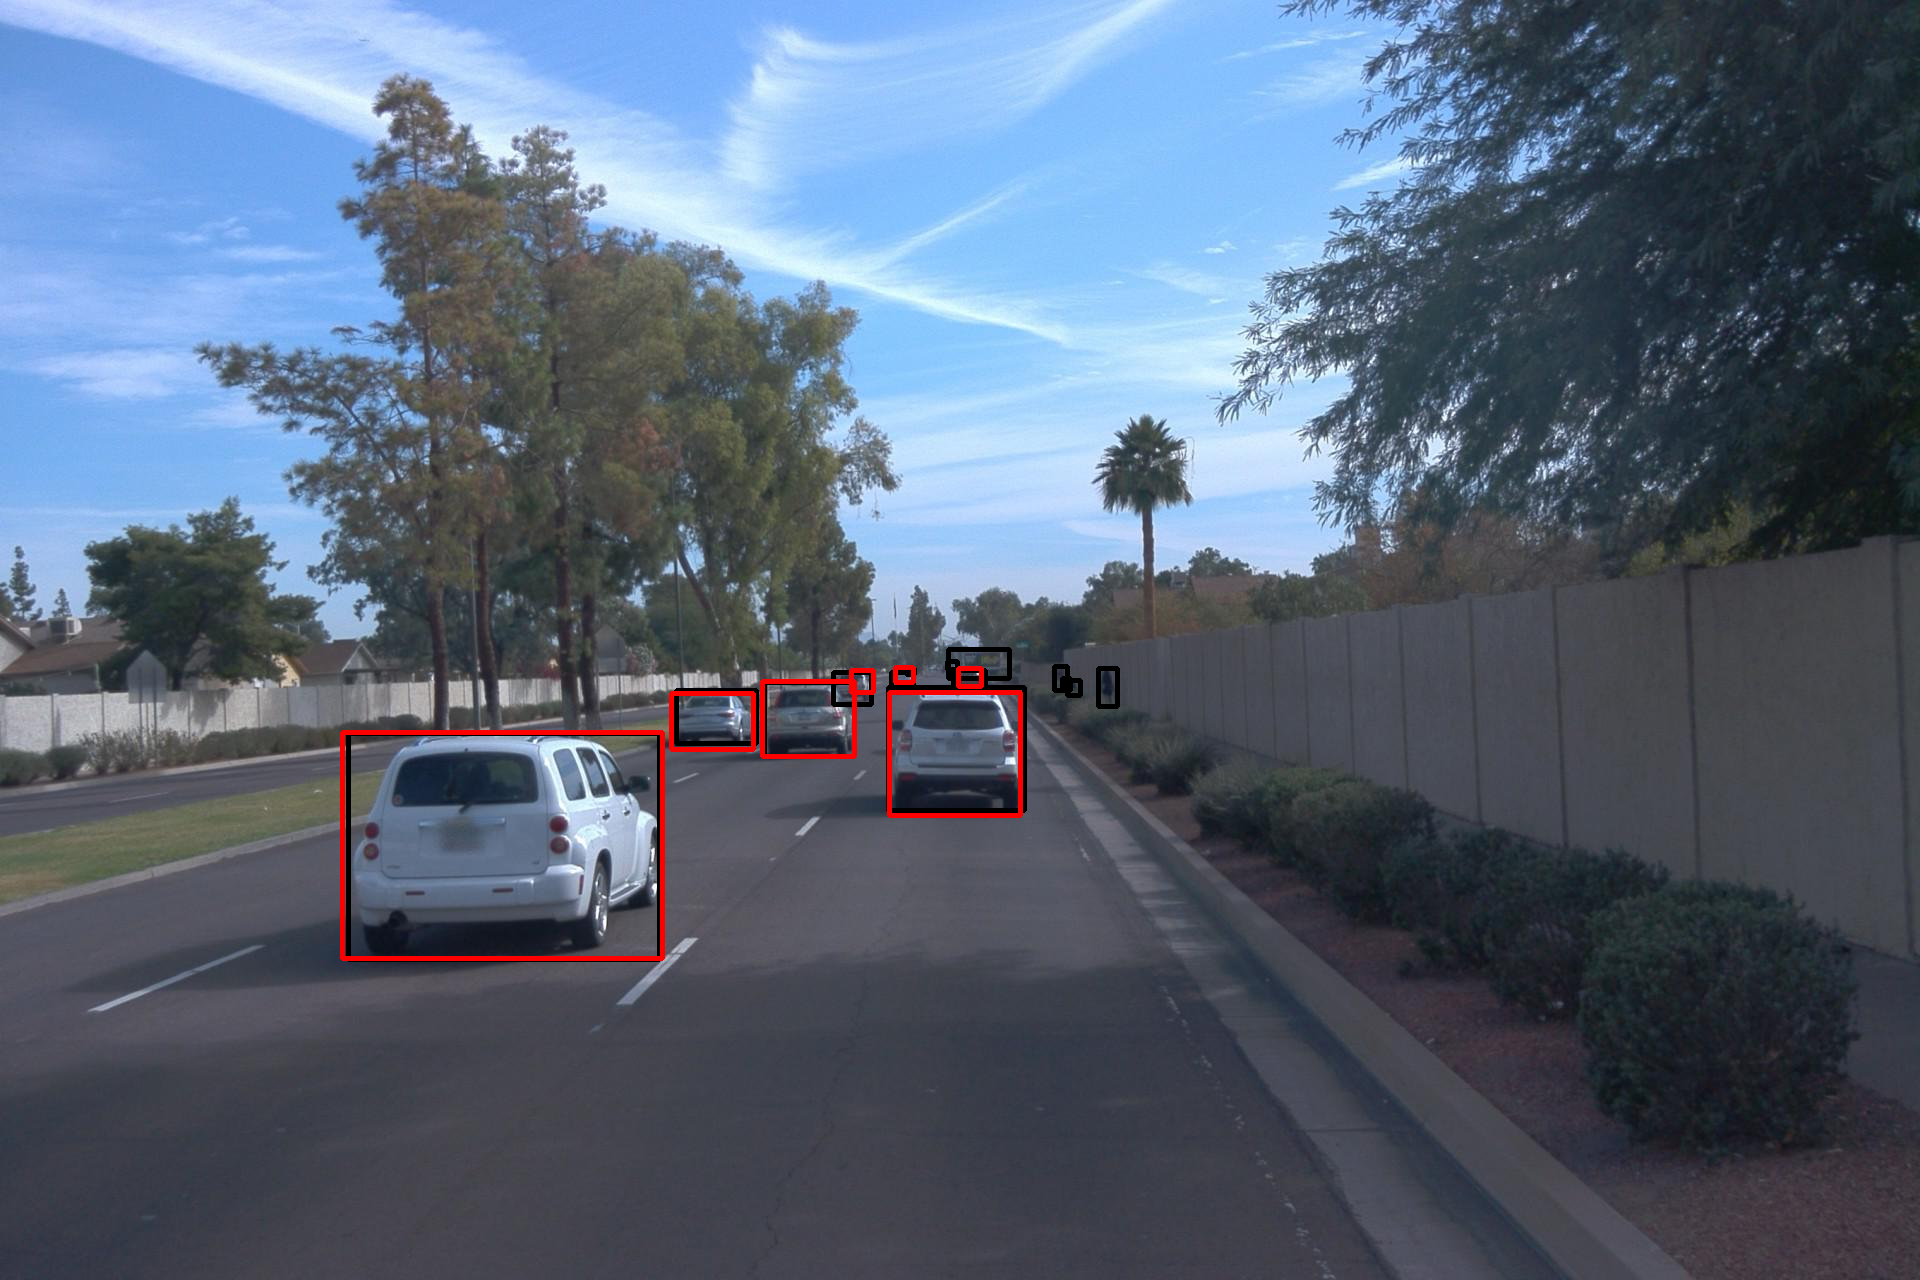

In [94]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

import cv2
from google.colab.patches import cv2_imshow

def visualize_prediction_vs_GT(image_path, GT_path, prediction_path):
  # Load annotations
  GT_annotations = read_annotations_from_file(GT_path)
  predicted_annotations = read_annotations_from_file(prediction_path)

  img = cv2.imread(image_path)
  for GT_label in GT_annotations:
      # Parse annotation info
      class_id = GT_label[0]
      xA = int(GT_label[1])
      xB = int(GT_label[2])
      yA = int(GT_label[3])
      yB = int(GT_label[4])
      # Draw bounding box
      cv2.rectangle(img,(xA, yA),(xB, yB),(0,0,0),3)

  for predicted_label in predicted_annotations:
    # Parse annotation info
      class_id = predicted_label[0]
      xA = int(predicted_label[1])
      xB = int(predicted_label[2])
      yA = int(predicted_label[3])
      yB = int(predicted_label[4])
      
      # Draw bounding box
      cv2.rectangle(img,(xA, yA),(xB, yB),(0,0,255),3)
      
  cv2_imshow(img)    

image_path =  data_path + "/YOLO/unit_tests/metric_calculation_file/image.jpg"
GT_path = data_path + "/YOLO/unit_tests/metric_calculation_file/GT.txt"
prediction_path = data_path + "/YOLO/unit_tests/metric_calculation_file/prediction.txt"
visualize_prediction_vs_GT(image_path, GT_path, prediction_path)

In [ ]:
def show_camera_image(camera_image, camera_labels, layout, cmap=None):
  """Show a camera image and the given camera labels."""

  ax = plt.subplot(*layout)

  # Draw the camera labels.
  for camera_labels in frame.camera_labels:
    # Ignore camera labels that do not correspond to this camera.
    if camera_labels.name != camera_image.name:
      continue

    # Iterate over the individual labels.
    for label in camera_labels.labels:
      # Draw the object bounding box.
      ax.add_patch(patches.Rectangle(
        xy=(label.box.center_x - 0.5 * label.box.length,
            label.box.center_y - 0.5 * label.box.width),
        width=label.box.length,
        height=label.box.width,
        linewidth=1,
        edgecolor='red',
        facecolor='none'))

  # Show the camera image
  plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
  plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
  plt.grid(False)
  plt.axis('off')

plt.figure(figsize=(25, 20))

for index, image in enumerate(frame.images):
  show_camera_image(image, frame.camera_labels, [3, 3, index+1])

# Object Detection using YOLO v3 and OpenCV (in development)

## Convert image from waymo format to be prepared for YOLO processing

In [88]:
from PIL import Image
import io

def save_image_for_YOLO_processing(input_img, img_name, labels):
  '''
  (the function is in development)

  Function take frame object from waymo open dataset and saves it for YOLO training in dedicated folder
  - YOLO expets to have annotation .txt file for each .jpg image file in the same directorz and with the same name
  - Annotation format: for each object separated line <object-class> <x> <y> <width> <height>
  
  Args:
    frame

  Returns:
  None
  '''

  output_folder = data_path + '/YOLO/training'

  # save image jpeg file
  image = Image.open(io.BytesIO(input_img))
  image.save(output_folder + "/" + img_name + ".jpg", "JPEG")

  # save annotation txt file
  with open(output_folder + "/" + img_name + ".txt", "w") as file:
    if labels != None:
      for label in labels.labels:
          label_str = str(label.type) +  " " + str(label.box.center_x) + " " + str(label.box.center_y) \
          + " " + str(label.box.length) + " " + str(label.box.width) + "\n"
          file.write(str(label_str))
    else:
      file.write("")

def save_frame_for_YOLO_processing(frame, timestamp):
  # iterate over all camera images in the frame

  for index, image in enumerate(frame.images):
    frame_name = frame.context.name
    camera_name = str(image.name)

    img_name = frame_name + "_" + str(timestamp) + "_" + camera_name

    # get corresponding labels 
    labels = None
    for camera_labels in frame.camera_labels:
      # Ignore camera labels that do not correspond to this camera.
      if camera_labels.name == image.name:
        labels = camera_labels
        break
      
    #print("- Image name: " + img_name) debug
    save_image_for_YOLO_processing(image.image, img_name, labels)

def save_recording_for_YOLO_processing(FILENAME):

  dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')

  i = 0
  step = 10 # extract only each xth frame
  processed_frame = 0

  for data in dataset:
    i += 1

    if i % step == 0:
      frame = open_dataset.Frame()
      frame.ParseFromString(bytearray(data.numpy())) 
      frame_timestamp = frame.timestamp_micros
      processed_frame += 1
      print(str(processed_frame) + ". Processed frame: " + frame.context.name + "_" + str(frame_timestamp))
      save_frame_for_YOLO_processing(frame, frame_timestamp)

FILEPATH = data_path + '/training/training_0000/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord'
save_recording_for_YOLO_processing(FILEPATH)


1. Processed frame: 1005081002024129653_5313_150_5333_150_1510593601040199
2. Processed frame: 1005081002024129653_5313_150_5333_150_1510593602040769
3. Processed frame: 1005081002024129653_5313_150_5333_150_1510593603040042
4. Processed frame: 1005081002024129653_5313_150_5333_150_1510593604039851
5. Processed frame: 1005081002024129653_5313_150_5333_150_1510593605040382
6. Processed frame: 1005081002024129653_5313_150_5333_150_1510593606040526
7. Processed frame: 1005081002024129653_5313_150_5333_150_1510593607040463
8. Processed frame: 1005081002024129653_5313_150_5333_150_1510593608039910
9. Processed frame: 1005081002024129653_5313_150_5333_150_1510593609039873
10. Processed frame: 1005081002024129653_5313_150_5333_150_1510593610040366
11. Processed frame: 1005081002024129653_5313_150_5333_150_1510593611040132
12. Processed frame: 1005081002024129653_5313_150_5333_150_1510593612040050
13. Processed frame: 1005081002024129653_5313_150_5333_150_1510593613040259
14. Processed frame: 

In [ ]:
#TODO: Implement function to iterary over all waymo recordings 
# and call the function save_recording_for_YOLO_processing

import os

def iterate_over_each_file(folder, extension):
  '''
  Function iterates over each files in a given directory

  This will be used to convert all training data to YOLo format

  Args: 
    folder(str)
  Returns:
    None
  '''
  for filename in os.listdir(folder):
    if filename.endswith(extension):
         # Call YOLO conversion
         print (filename)

PATH = data_path + "/Training/training_0000"
iterate_over_each_waymo_file(PATH, ".tfrecord")

## Object Detection using pretrained YOLO

In [ ]:
!pip3 install opencv-python numpy matplotlib

In [35]:
import cv2
import numpy as np

import time
import sys
import os

Initialize YOLO

In [89]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5

# the neural network configuration
config_path = data_path + "/YOLO/yolov3.cfg"
# the YOLO net weights file
weights_path = data_path + "/YOLO/yolov3.weights"
# weights_path = "weights/yolov3-tiny.weights"

# loading all the class labels (objects)
labels = open(data_path + "/YOLO/coco.names").read().strip().split("\n")
# generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

# load the YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

YOLO_predict

In [90]:
def yolo_classid_into_waymo_format(class_id):
  '''
    Converts classid provided by default pretrained YOLO network
    into the waymo format, so they represents the same.

    Args
      class_id(int): classid in default YOLO format

    Returns:
      class_id(int): classid in waymo format
  '''

  if class_id == 0: # covert pedestrian classid into waymo format
    class_id = ClassID.TYPE_PEDESTRIAN.value

  elif class_id == 1: # covert cyclist classid into waymo format
    class_id = ClassID.TYPE_CYCLIST.value

  elif class_id == 2: # covert car classid into waymo format
    class_id = ClassID.TYPE_VEHICLE.value

  else: # covert car classid into waymo format
    class_id = ClassID.TYPE_UNKNOWN.value

  return class_id

In [92]:
def YOLO_predict(image_path, output_folder, saveimage=False):
  image = cv2.imread(image_path)
  file_name = os.path.basename(image_path)
  filename, ext = file_name.split(".")

  h, w = image.shape[:2]
  # create 4D blob
  blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

  # sets the blob as the input of the network
  net.setInput(blob)
  # get all the layer names
  ln = net.getLayerNames()
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  # feed forward (inference) and get the network output
  layer_outputs = net.forward(ln)

  font_scale = 1
  thickness = 1
  boxes, confidences, class_ids = [], [], []
  # loop over each of the layer outputs
  for output in layer_outputs:
    # loop over each of the object detections
    for detection in output:
        # extract the class id (label) and confidence (as a probability) of
        # the current object detection
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # discard out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > CONFIDENCE:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2)) 

            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)]) 
            confidences.append(float(confidence))
            class_ids.append(class_id)

  idxs = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)

  labels_txt = []

  # ensure at least one detection exists
  if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        x, y = boxes[i][0], boxes[i][1] 
        w, h = boxes[i][2], boxes[i][3]

        centerX = int(x + (w / 2)) 
        centerY = int(y + (h / 2)) 

        class_id = yolo_classid_into_waymo_format(class_ids[i])
        label_str = str(class_id) + " " + str(centerX) + " " + str(centerY) + " " + str(w) + " " + str(h) 

        labels_txt.append(label_str)
        # draw a bounding box rectangle and label on the image

        color = [int(c) for c in colors[class_ids[i]]]

        cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness=thickness)
        text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
        # calculate text width & height to draw the transparent boxes as background of the text
        (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
        text_offset_x = x
        text_offset_y = y - 5
        box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
        overlay = image.copy()
        cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
        # add opacity (transparency to the box)
        image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
        # now put the text (label: confidence %)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=font_scale, color=(0, 0, 0), thickness=thickness)

  # wite annotation into output file
  annotation_path = output_folder + '/' + filename + ".txt"

  with open(annotation_path, "w") as file:
    for label in labels_txt:
      file.write(label + os.linesep)

  if saveimage == True:
    cv2.imwrite(output_folder + '/' + filename + "_yolo3." + ext, image)

In [93]:
# Process all images via pretrained YOLO network
def YOLO_predict_folder(input_folder, output_folder, saveimage=False):
  '''
    Loads list of .txt files with ground truth 
    and list of .txt files with predictions from a given folders

    Args:
      GT_folder(str): folder containing all ground truth detections
      prediction_folder(str): folder containing all predicted detections

    Output:
      GT_files, predicted_files
      - GT_files(list): list of files with ground truth
      - predicted_files(set): list of files with predictions
  '''
  # Iterate over each image in inpute folder and predict there objects with YOLO
  # measure how much it took in seconds
  print("Starting YOLO_predict")
  print("- Input folder: {}".format(input_folder))
  print("- Output folder: {}".format(output_folder))
  print("- saveimage: {}\n".format(saveimage))

  i = 1
  start = time.perf_counter()
  for item in os.listdir(input_folder):
    file_path = os.path.join(input_folder, item)
    if os.path.isfile(file_path):
      if item.endswith(".jpg"): 
        YOLO_predict(file_path, output_folder, saveimage)
        time_took = time.perf_counter() - start
        print("- {}. Image predicted. Total runtime: {:.1f}s".format(i, time_took))
        i += 1

  time_took = time.perf_counter() - start
  
  print("\nFinished YOLO_predict")
  print("- Input folder: {}".format(input_folder))
  print("- Output folder: {}".format(output_folder))
  print("- saveimage: {}".format(saveimage))
  print("- Predicted images: {}".format(i))
  print("- Time took: {:.1f}s".format(time_took))

input_folder = data_path + "/YOLO/training"
output_folder = data_path + "/YOLO/prediction"
YOLO_predict_folder(input_folder, output_folder, True)

Starting YOLO_predict
- Input folder: /content/drive/My Drive/Colab Notebooks/data/waymo_open_dataset/YOLO/training
- Output folder: /content/drive/My Drive/Colab Notebooks/data/waymo_open_dataset/YOLO/prediction
- saveimage: True

- 1. Image predicted. Total runtime: 3.1s
- 2. Image predicted. Total runtime: 5.6s
- 3. Image predicted. Total runtime: 7.9s
- 4. Image predicted. Total runtime: 10.1s
- 5. Image predicted. Total runtime: 12.4s
- 6. Image predicted. Total runtime: 14.7s
- 7. Image predicted. Total runtime: 17.0s
- 8. Image predicted. Total runtime: 19.3s
- 9. Image predicted. Total runtime: 21.5s
- 10. Image predicted. Total runtime: 23.8s
- 11. Image predicted. Total runtime: 26.1s
- 12. Image predicted. Total runtime: 28.3s
- 13. Image predicted. Total runtime: 30.5s
- 14. Image predicted. Total runtime: 32.7s
- 15. Image predicted. Total runtime: 35.0s
- 16. Image predicted. Total runtime: 37.3s
- 17. Image predicted. Total runtime: 39.6s
- 18. Image predicted. Total run

## Compute performance metric for output of pretrained YOLO network

In [97]:
# Execute Metric Calculation
GT_folder = data_path + "/YOLO/training"
prediction_folder = data_path + "/YOLO/prediction"
output_file = data_path + "/YOLO/metric_results/metric_results.log"

res = execute_metric_calculation(GT_folder, prediction_folder, output_file)

-------------------------------------------------------------------------------------------------
Performance metrics:
class_type            | AVG Precision  | AVG Recall  | TP       | FP       | FN
-------------------------------------------------------------------------------------------------
TYPE_UNKNOWN          | 0.00           | 0.00        | 0.00     | 11.00    | 0.00
TYPE_VEHICLE          | 0.73           | 0.34        | 108.00   | 40.00    | 207.00
TYPE_PEDESTRIAN       | 0.86           | 0.19        | 6.00     | 1.00     | 25.00
TYPE_SIGN             | 0.00           | 0.00        | 0.00     | 0.00     | 0.00
TYPE_CYCLIST          | 0.00           | 0.00        | 0.00     | 0.00     | 0.00
-------------------------------------------------------------------------------------------------
mAP: 0.3173745173745174

You can find the complete report in
 /content/drive/My Drive/Colab Notebooks/data/waymo_open_dataset/YOLO/metric_results/metric_results.log


In [96]:
# Debug: Execute matric calculation for a selected file
GT_file_path = data_path + "/YOLO/training/1005081002024129653_5313_150_5333_150_1510593601040199_1.txt"
prediction_file_path = data_path + "/YOLO/prediction/1005081002024129653_5313_150_5333_150_1510593601040199_1.txt"
output_file = data_path + "/YOLO/metric_results/metric_results.log"

res = execute_metric_calculation_file(GT_file_path, prediction_file_path, output_file)

-------------------------------------------------------------------------------------------------
Performance metrics:
class_type            | AVG Precision  | AVG Recall  | TP       | FP       | FN
-------------------------------------------------------------------------------------------------
TYPE_UNKNOWN          | 0.00           | 0.00        | 0.00     | 0.00     | 0.00
TYPE_VEHICLE          | 0.57           | 0.40        | 4.00     | 3.00     | 6.00
TYPE_PEDESTRIAN       | 0.00           | 0.00        | 0.00     | 0.00     | 4.00
TYPE_SIGN             | 0.00           | 0.00        | 0.00     | 0.00     | 0.00
TYPE_CYCLIST          | 0.00           | 0.00        | 0.00     | 0.00     | 0.00
-------------------------------------------------------------------------------------------------
mAP: 0.11428571428571428

You can find the complete report in
 /content/drive/My Drive/Colab Notebooks/data/waymo_open_dataset/YOLO/metric_results/metric_results.log


In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5904, done.
remote: Total 5904 (delta 0), reused 0 (delta 0), pack-reused 5904
Receiving objects: 100% (5904/5904), 6.17 MiB | 20.07 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.


In [ ]:
cd darknet

/content/darknet


In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Download files 
*   yolov.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
*   weights https://pjreddie.com/media/files/yolov3-openimages.weights
*   label names https://github.com/pjreddie/darknet/tree/master/data/coco.names



In [ ]:
# download the weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-05-21 09:17:40--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  82.2KB/s    in 43m 54s 

2020-05-21 10:01:36 (91.9 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/cars_image.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

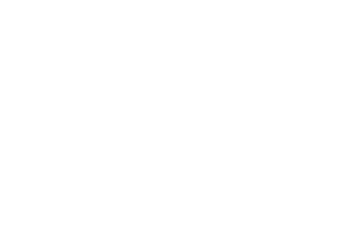

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

## Train YOLO network with Waymo data


# Solution with R-CNN  (stage 2)

